In [3]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Setting up dataframe, dealing with null values

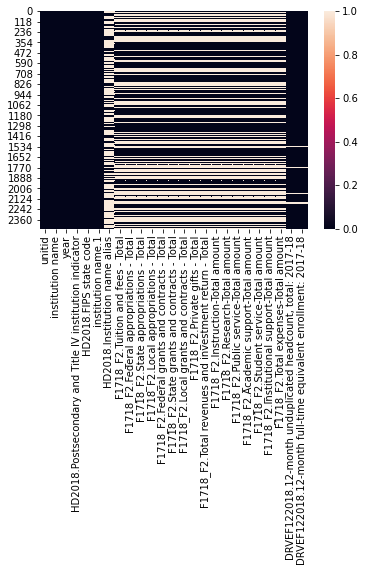

In [4]:
df_before_drop = pd.read_csv('https://raw.githubusercontent.com/semblables/capstone_1/master/colleges_dataset.csv')
sns.heatmap(df_before_drop.isnull())

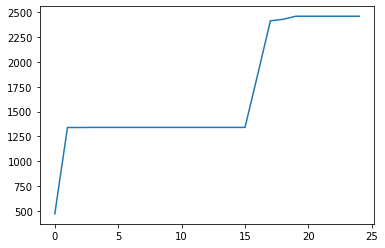

In [5]:
df_drop_trial = df_before_drop.copy()

# Checking out how the number of not-dropped rows increases as threshold of
# null values increases.
lengths_dropping = [len(df_drop_trial.dropna(thresh=i)) for i in range(25, 0, -1)]
plt.plot(lengths_dropping)

I'm gonna drop some variables to see if that helps me out any.

In [6]:
df_before_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 25 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   unitid                                                         2460 non-null   int64  
 1   institution name                                               2460 non-null   object 
 2   year                                                           2460 non-null   int64  
 3   HD2018.Postsecondary and Title IV institution indicator        2460 non-null   object 
 4   HD2018.FIPS state code                                         2460 non-null   object 
 5   institution name.1                                             2460 non-null   object 
 6   HD2018.Institution name alias                                  1017 non-null   object 
 7   F1718_F2.Tuition and fees - Total                           

In [7]:
dropping_cols = ['year',
             'HD2018.Postsecondary and Title IV institution indicator',
             'HD2018.FIPS state code',
             'institution name.1',
             'HD2018.Institution name alias',
             'DRVEF122018.12-month unduplicated headcount, total: 2017-18'
             ]

keep_cols = ['unitid',
             'institution name',
             'F1718_F2.Tuition and fees - Total',
             'F1718_F2.Federal appropriations - Total',
             'F1718_F2.State appropriations - Total',
             'F1718_F2.Local appropriations - Total',
             'F1718_F2.Federal grants and contracts - Total',
             'F1718_F2.State grants and contracts - Total',
             'F1718_F2.Local grants and contracts - Total',
             'F1718_F2.Private gifts - Total',
             'F1718_F2.Total revenues and investment return - Total',
             'F1718_F2.Instruction-Total amount']
             # unfinished

In [8]:
df_filtered = df_before_drop.drop(columns=dropping_cols)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 19 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   unitid                                                         2460 non-null   int64  
 1   institution name                                               2460 non-null   object 
 2   F1718_F2.Tuition and fees - Total                              1341 non-null   float64
 3   F1718_F2.Federal appropriations - Total                        1341 non-null   float64
 4   F1718_F2.State appropriations - Total                          1341 non-null   float64
 5   F1718_F2.Local appropriations - Total                          1341 non-null   float64
 6   F1718_F2.Federal grants and contracts - Total                  1341 non-null   float64
 7   F1718_F2.State grants and contracts - Total                 

In [9]:
len(df_filtered)

2460

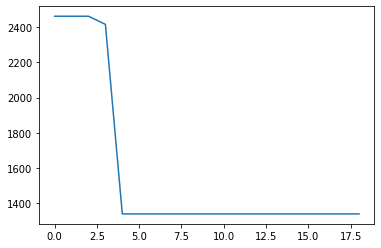

In [10]:
lengths_dropping_2 = [len(df_filtered.dropna(thresh=i)) for i in range(0, len(df_filtered.columns))]
plt.plot(lengths_dropping_2)

In [11]:
len(df_filtered)

2460

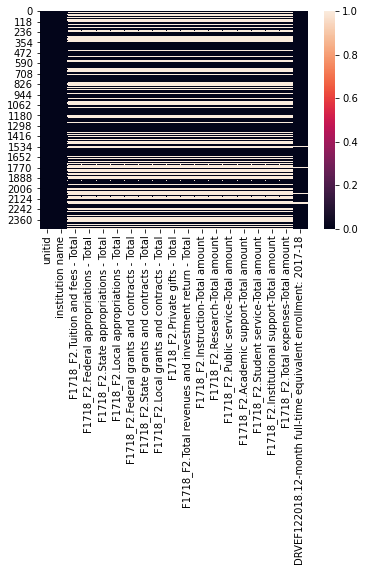

In [12]:
sns.heatmap(df_filtered.isnull())

In [13]:
df_filtered_drop_trial = df_filtered.copy()

1341


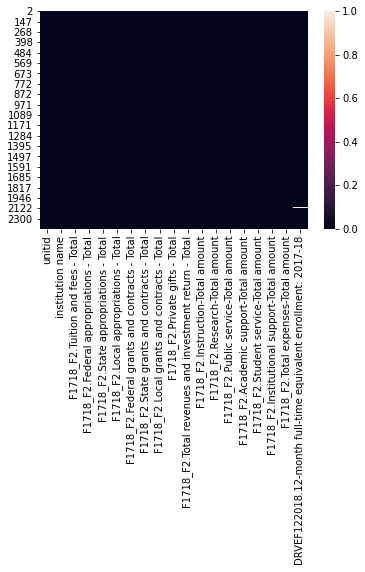

In [14]:
df_filtered_drop_trial = df_filtered_drop_trial.dropna(axis=0, thresh=4)
print(len(df_filtered_drop_trial))
sns.heatmap(df_filtered_drop_trial.isnull())

In [15]:
# dropping rows with more than 4 nulls

df_cleaned = df_filtered.dropna(axis=0, thresh=4)

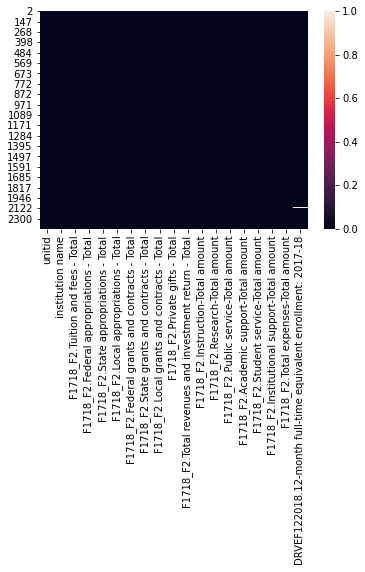

In [16]:
sns.heatmap(df_cleaned.isnull())

In the next section I experiment with setting up a new dataframe in order to not lose as many values, but I'm going to stick with this approach for the moment.

### Exploring other dataframes

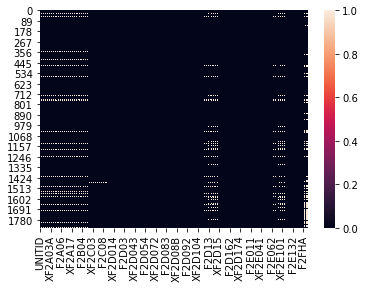

In [17]:
full_finance = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/F1718_F2.zip')
sns.heatmap(full_finance.isnull())

In [18]:
full_directory = pd.read_csv('https://nces.ed.gov/ipeds/datacenter/data/HD2018.zip',
                             encoding = "ISO-8859-1")

### Merging rankings dataframes

In [19]:
path = 'http://andyreiter.com/wp-content/uploads/2020/09/US-News-Rankings-Liberal-Arts-Colleges-Through-2021.xlsx'
ranking_lib_arts = pd.read_excel(path)
short_lib_ranked_uncopied = ranking_lib_arts[['Unnamed: 2',
                                              'Unnamed: 5']]
short_lib_ranked = short_lib_ranked_uncopied.copy()
short_lib_ranked.columns = ['unitid', 'ranking']
short_lib_ranked.head()

,unitid,ranking
0,IPEDS ID,2019
1,168342,1
2,164465,2
3,216287,3
4,168218,3


In [20]:
path = 'http://andyreiter.com/wp-content/uploads/2020/09/US-News-Rankings-Universities-Through-2021.xlsx'
ranking_uni = pd.read_excel(path)
short_uni_ranked_uncopied = ranking_uni[['Unnamed: 1',
                                         'Unnamed: 5']]
short_uni_ranked = short_uni_ranked_uncopied.copy()
short_uni_ranked.columns = ['unitid', 'ranking']
short_uni_ranked.head()

,unitid,ranking
0,IPEDS ID,2019.0
1,186131,1.0
2,166027,2.0
3,190150,3.0
4,166683,3.0


In [21]:
rankings = pd.concat([short_uni_ranked, short_lib_ranked])

# Confirming concatenated df is length of prev 2 dfs combined.
len(rankings) == len(short_lib_ranked) + len(short_uni_ranked)

True

In [22]:
merged = pd.merge(df_cleaned, rankings, on='unitid', how='left')

In [23]:
merged[~merged.ranking.isnull()].ranking[:5]

1              131
6     T2 (173-229)
12    T2 (173-229)
13    T2 (173-229)
24    T2 (173-229)
Name: ranking, dtype: object

In [24]:
merged.ranking.value_counts()[:5]

T2 (173-229)    46
143              8
95               7
155              6
3.0              6
Name: ranking, dtype: int64

In [25]:
merged.ranking.isnull().value_counts()

True     1106
False     241
Name: ranking, dtype: int64

I should probably create another column that's a boolean filter on whether they're ranked or not.

In [26]:
merged['ranked'] = merged.ranking.notnull()
# Checking work

merged[merged.ranked == True].ranking[:5]

1              131
6     T2 (173-229)
12    T2 (173-229)
13    T2 (173-229)
24    T2 (173-229)
Name: ranking, dtype: object

In [27]:
data = merged

### Exploring variables

(array([ 34.,  62., 101., 152., 209., 213., 241., 149.,  97.,  89.]),
 array([2.91221212e-05, 1.00026210e-01, 2.00023298e-01, 3.00020385e-01,
        4.00017473e-01, 5.00014561e-01, 6.00011649e-01, 7.00008737e-01,
        8.00005824e-01, 9.00002912e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

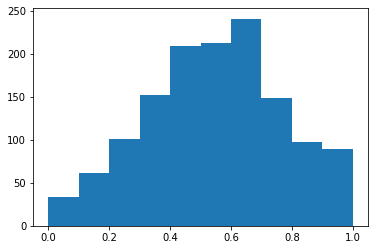

In [28]:
# Revenue from tuition and fees as ratio of total revenues
plt.hist(data['F1718_F2.Tuition and fees - Total'] / data['F1718_F2.Total revenues and investment return - Total'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  4.,  14.,  27.,  55.,  62., 121., 152., 168., 152., 115., 124.,
         60.,  52.,  46.,  32.,  37.,  32.,  27.,  19.,  16.,   7.,   9.,
          2.,   5.,   2.,   1.,   0.,   1.,   1.,   3.]),
 array([4.20168067e+00, 1.73193525e+03, 3.45966882e+03, 5.18740239e+03,
        6.91513596e+03, 8.64286953e+03, 1.03706031e+04, 1.20983367e+04,
        1.38260702e+04, 1.55538038e+04, 1.72815374e+04, 1.90092709e+04,
        2.07370045e+04, 2.24647381e+04, 2.41924717e+04, 2.59202052e+04,
        2.76479388e+04, 2.93756724e+04, 3.11034059e+04, 3.28311395e+04,
        3.45588731e+04, 3.62866066e+04, 3.80143402e+04, 3.97420738e+04,
        4.14698074e+04, 4.31975409e+04, 4.49252745e+04, 4.66530081e+04,
        4.83807416e+04, 5.01084752e+04, 5.18362088e+04]),
 <a list of 30 Patch objects>)

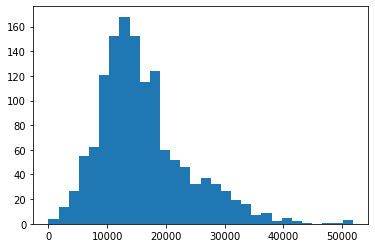

In [29]:
# Revenue from tuition and fees as ratio of FTE student qty
plt.hist(data['F1718_F2.Tuition and fees - Total'] /
         data['DRVEF122018.12-month full-time equivalent enrollment: 2017-18'],
         bins=30)

(array([ 1.,  0.,  2.,  7., 12., 19., 25., 21., 17., 22., 12., 10., 11.,
        10.,  7., 11., 10.,  8., 12.,  8.,  2.,  6.,  1.,  3.,  1.,  0.,
         0.,  1.,  0.,  2.]),
 array([ 2570.73295129,  4182.30345085,  5793.87395041,  7405.44444997,
         9017.01494954, 10628.5854491 , 12240.15594866, 13851.72644822,
        15463.29694778, 17074.86744735, 18686.43794691, 20298.00844647,
        21909.57894603, 23521.14944559, 25132.71994516, 26744.29044472,
        28355.86094428, 29967.43144384, 31579.0019434 , 33190.57244296,
        34802.14294253, 36413.71344209, 38025.28394165, 39636.85444121,
        41248.42494077, 42859.99544034, 44471.5659399 , 46083.13643946,
        47694.70693902, 49306.27743858, 50917.84793814]),
 <a list of 30 Patch objects>)

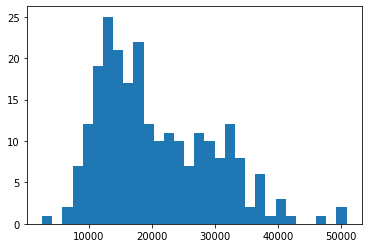

In [30]:
# Let's see what the average is for ranked institutions

ranked_institutions = data[data.ranked]
plt.hist(ranked_institutions['F1718_F2.Tuition and fees - Total'] /
         ranked_institutions['DRVEF122018.12-month full-time equivalent enrollment: 2017-18'],
         bins=30)

### Setting up variables of interest

So I'm going to need the following variables to do my analysis.

Type of funding vs. total revenue:
*   Paid Tuition vs Total Rev
*   Gifts vs Total Rev
*   Gov't Funding vs Total Rev

Type of funding vs. number of full-time equivalent (FTE) students:
*   Paid Tuition per FTE
*   Gifts per FTE
*   Gov't Funding per FTE

Then metrics measuring administrative spending ('institutional support'):
*   Institutional support vs. total non-institutional support spending
*   Institutional & acaedmic support vs. total non-institutional, non-academic support support spending
*   Institutional & academic support vs. instruction spedning
*   Institutional support vs. instruction spedning
*   Institutional & academic support vs. core spending*
*   Institutional support vs. core spending*

*Core spending is spending in any of the following categories: Public Service, Instruction, Research, or Student Services

It should be noted that "academic support" spending includes spending for academic administration, but also services like libraries, galleries, and museums. Because it includes some administrative salaries, I'm going to run tests with it included and not includedin "administrative" spending.

I noticed while working on this that HCSM also uses FTE to calculate institution size, so that was a cool confirmation of my methodology.



In [32]:
data['tuition'] = data['F1718_F2.Tuition and fees - Total']
data['gifts'] = data['F1718_F2.Private gifts - Total']
data['govt'] = (data['F1718_F2.Federal appropriations - Total'] +
        data['F1718_F2.State appropriations - Total'] +
        data['F1718_F2.Local appropriations - Total'] +
        data['F1718_F2.Federal grants and contracts - Total'] +
        data['F1718_F2.State grants and contracts - Total'] +
        data['F1718_F2.Local grants and contracts - Total']
        )

data['revenue'] = data['F1718_F2.Total revenues and investment return - Total']
data['fte'] = data['DRVEF122018.12-month full-time equivalent enrollment: 2017-18']

data['institutional'] = data['F1718_F2.Institutional support-Total amount']
data['academic'] = data['F1718_F2.Academic support-Total amount']
data['student'] = data['F1718_F2.Student service-Total amount']
data['public'] = data['F1718_F2.Public service-Total amount']
data['instruction'] = data['F1718_F2.Instruction-Total amount']
data['research'] = data['F1718_F2.Research-Total amount']
data['total_expenses'] = data['F1718_F2.Total expenses-Total amount']


data['institutional_and_academic'] = data.institutional + data.academic
data['non_institutional'] = data.total_expenses - data.institutional
data['non_institutional_and_academic'] = data.total_expenses - data.institutional - data.academic
data['core'] = data.institutional + data.student + data.public + data.research

data['tuition_vs_rev'] = data.tuition / data.revenue
data['gifts_vs_rev'] = data.gifts / data.revenue
data['govt_vs_rev'] = data.govt / data.revenue

data['tuition_per_fte'] = data.tuition / data.fte
data['gifts_per_fte'] = data.gifts / data.fte
data['govt_per_fte'] = data.govt / data.fte

data['institutional_vs_non'] = data.institutional / data.non_institutional

data['institutional_and_acedemic_vs_non'] = (
    data.institutional_and_academic /
    data.non_institutional_and_academic 
)
data['institutional_and_academic_vs_instruction'] = (
    data.institutional_and_academic / data.instruction
)
data['institutional_vs_instruction'] = data.institutional / data.instruction

data['institutional_and_academic_vs_instruction'] = (
    data.institutional_and_academic / data.instruction
)
data['institutional_vs_core'] = data.institutional / data.core

data['institutional_and_academic_vs_core'] = (
    data.institutional_and_academic / data.core
)

### Checking to see if distributions are normal

In [33]:
def check_normal(var): 

  nobs, minmax, mean, variance, skewness, kurtosis = stats.describe(var)

  if variance > 20 or variance < -20:
    print(var.name, ' variance not in range.')

  if kurtosis > 8 or kurtosis < -8:
    print(var.name, ' kurtosis not in range.')
  
  w_val, p_val = stats.shapiro(var)

  if p_val > 0.05:
    print(var.name, ' fails shapiro test.')

  plt.hist(var, bins=30)
  plt.title(var.name)
  plt.show()

  return variance, kurtosis, p_val

def short_normal(var):
  print(var.name)
  print(stats.describe(var))
  print(stats.shapiro(var))
  plt.hist(var, bins=30)
  plt.show()

In [34]:
list_vars = [data.tuition,
             data.gifts,
             data.govt,
             data.revenue,
             data.fte,
             data.institutional,
             data.academic,
             data.institutional_and_academic,
             data.student,
             data.public,
             data.instruction,
             data.research,
             data.total_expenses
             ]

In [35]:
# there was an error with institutional_vs_academic ill check out separately

list_derived_vars = [data['tuition_vs_rev'],
             data['gifts_vs_rev'],
             data['govt_vs_rev'],
             data['tuition_per_fte'],
             data['gifts_per_fte'],
             data['govt_per_fte'],
             data['institutional_vs_non'],
             data['institutional_and_acedemic_vs_non'],
             data['institutional_and_academic_vs_instruction'],
             data['institutional_vs_instruction'],
             data['institutional_and_academic_vs_instruction'],
             data['institutional_vs_core']
             ]

(array([295., 226., 172., 149., 113.,  96.,  56.,  42.,  33.,  27.,  19.,
         15.,  15.,  17.,   7.,  10.,   9.,   9.,   5.,   8.,   6.,   5.,
          3.,   3.,   3.,   0.,   1.,   1.,   1.,   1.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

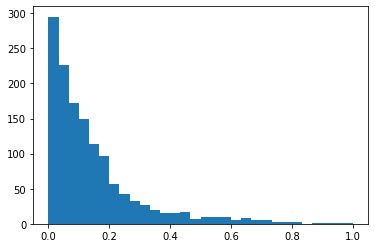

In [36]:
data['gifts_normalized'] = (data.gifts_vs_rev - data.gifts_vs_rev.min()) / (data.gifts_vs_rev.max() - data.gifts_vs_rev.min())
plt.hist(data.gifts_normalized, bins=30)

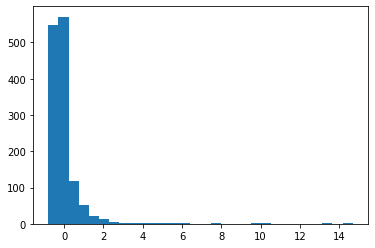

In [38]:
data['ii_standardized'] = (
    (data.institutional_vs_instruction - data.institutional_vs_instruction.mean()) / 
    data.institutional_vs_instruction.std()
    )
plt.hist(data.ii_standardized, bins=30)
plt.show()

ii_standardized
DescribeResult(nobs=1347, minmax=(-0.8025572018923877, 14.681134023703072), mean=1.709100567084428e-15, variance=1.0000000000000007, skewness=7.7931743499727055, kurtosis=84.5470914660497)
(0.4235793948173523, 0.0)


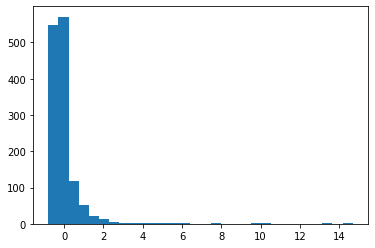

In [39]:
short_normal(data.ii_standardized)

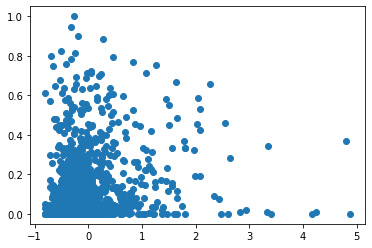

In [40]:
data_shaped = data[data.ii_standardized < 5]
plt.scatter(data_shaped['ii_standardized'], data_shaped['gifts_normalized'])

In [41]:
stats.ttest_rel(data_shaped.ii_standardized, data_shaped.gifts_normalized)

Ttest_relResult(statistic=-12.97655531291273, pvalue=2.3642279173152804e-36)

gifts_normalized
DescribeResult(nobs=1347, minmax=(0.0, 1.0), mean=0.14283353233167775, variance=0.02440761289698024, skewness=2.0510388157831274, kurtosis=4.831386264470215)
(0.7842181324958801, 6.675910599606753e-39)


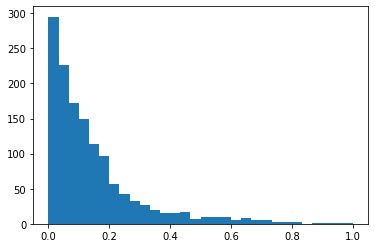

In [42]:
short_normal(data.gifts_normalized)

tuition  variance not in range.
tuition  kurtosis not in range.


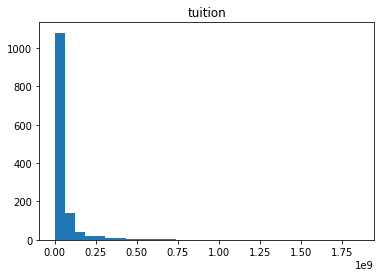

gifts  variance not in range.
gifts  kurtosis not in range.


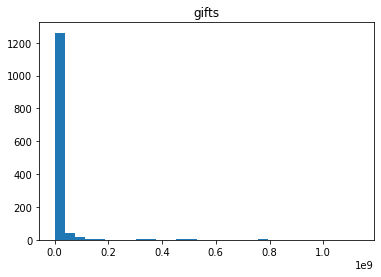

govt  variance not in range.
govt  kurtosis not in range.


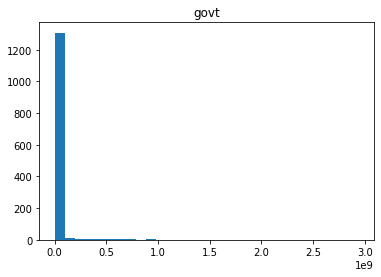

revenue  variance not in range.
revenue  kurtosis not in range.


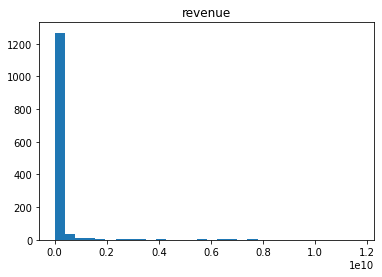

fte  fails shapiro test.


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


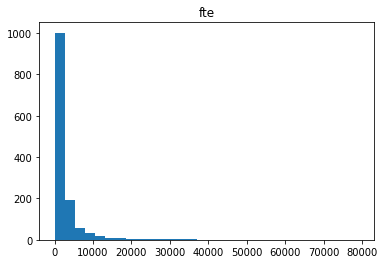

institutional  variance not in range.
institutional  kurtosis not in range.


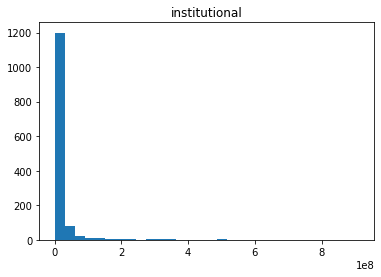

academic  variance not in range.
academic  kurtosis not in range.


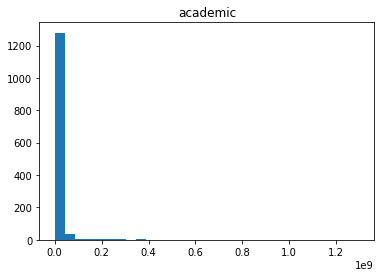

institutional_and_academic  variance not in range.
institutional_and_academic  kurtosis not in range.


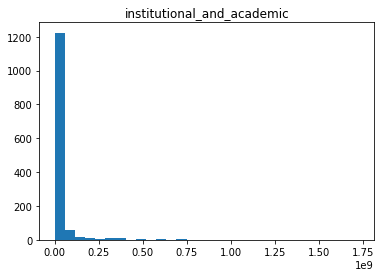

student  variance not in range.
student  kurtosis not in range.


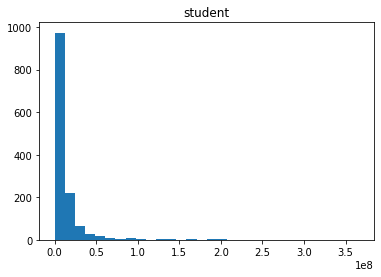

public  variance not in range.
public  kurtosis not in range.


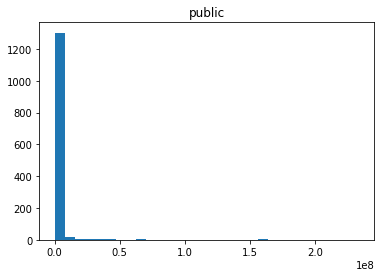

instruction  variance not in range.
instruction  kurtosis not in range.


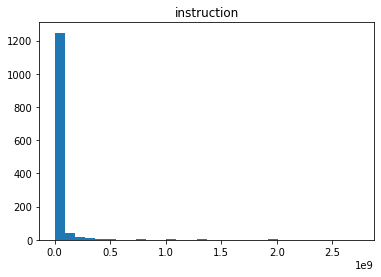

research  variance not in range.
research  kurtosis not in range.


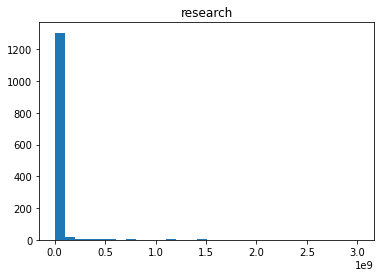

total_expenses  variance not in range.
total_expenses  kurtosis not in range.


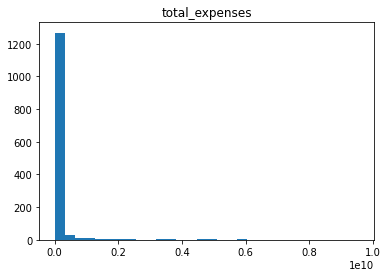

In [43]:
for var in list_vars:
  check_normal(var)

Looks like there are a lot of zero values that are throwing off the distribution. We'll just eliminate zero values from the distributions we're looking at and qualify these analysis with 'for insititutions with this type of funding.' This list includes: gifts, govt, institutional, and academic support.


In [44]:
data = data[data.govt != 0]
data = data[data.gifts != 0]
data = data[data.institutional != 0]
data = data[data.academic != 0]

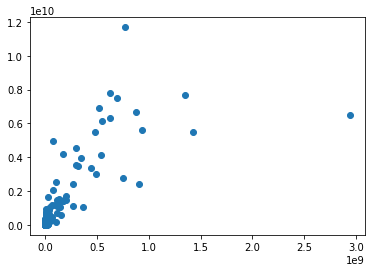

In [45]:
plt.scatter(x=data.govt, y=data.revenue)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


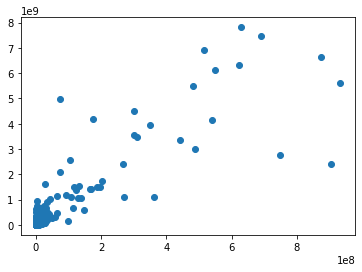

In [46]:
data_trial = data[data.govt < 1.1 * 10**9][data.revenue < .85 * 10 ** 10]
plt.scatter(x=data_trial.govt, y=data_trial.revenue)

govt_vs_rev  kurtosis not in range.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


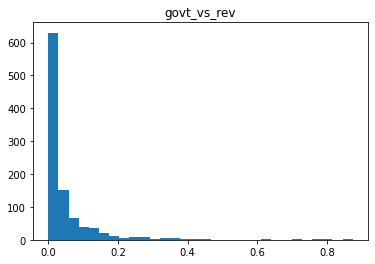

(0.006620420810623828, 33.23114448239625, 1.401298464324817e-45)

In [47]:
data = data[data.govt < 1.1 * 10**9][data.revenue < .85 * 10 ** 10]
check_normal(data.govt_vs_rev)

In [48]:
(data.tuition / data.revenue).mean()

0.5289526724901936

In [49]:
(data.institutional / data.instruction).mean()

0.6603321253504592